In [65]:
import numpy as np
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from IPython.display import display

In [68]:
# Pascal's triangle

factorialsCache = {}
def factorial(n):
    if n <= 1:
        return 1
    
    key = str(n)
    if key in factorialsCache:
        return factorialsCache[key]
    
    solution = n * factorial(n - 1)
    factorialsCache[key] = solution
    return solution

def binomial(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

def pascalRow(rowNum):
    solution = []
    for i in range(rowNum + 1):
        solution.append(binomial(rowNum, i))
    return solution

def pascalTriangle(numberOfRows):
    rows = []
    for n in range(numberOfRows):
        row = pascalRow(n)
        while len(row) < numberOfRows:
            row.append(0)
        rows.append(row)
    return np.array(rows)

def formatPascalTriangle(numberOfRows):
    triangle = pascalTriangle(numberOfRows)
    length = len(triangle)
    maxDigits = int(np.log10(np.max(triangle))) + 1
    rows = []
    for rowNum in range(len(triangle)):
        formatted = formatRow(triangle, rowNum, maxDigits, length)
        rows.append(formatted)
    return rows

def formatRow(triangle, rowNum, maxDigits, length):
    row = triangle[rowNum]
    rowStr = ''
    for n in row:
        if n > 0:
            digits = int(np.log10(n)) + 1
            padding = maxDigits - digits
            if len(rowStr) > 0:
                padding += 1
            rowStr = rowStr + (' ' * padding) + str(int(n))
    lengthToAdd = (maxDigits * length + length - 1) - len(rowStr)
    lengthToAdd //= 2
    return (' ' * lengthToAdd) + rowStr + (' ' * lengthToAdd)

In [69]:
numberOfRowsPrompt = widgets.IntText(
    value=3,
    description='Rows:',
    disabled=False
)

In [83]:
display(numberOfRowsPrompt)
for row in formatPascalTriangle(numberOfRowsPrompt.value):
    print(row)

IntText(value=20, description='Rows:')

                                                             1                                                         
                                                          1     1                                                      
                                                       1     2     1                                                   
                                                    1     3     3     1                                                
                                                 1     4     6     4     1                                             
                                              1     5    10    10     5     1                                          
                                           1     6    15    20    15     6     1                                       
                                        1     7    21    35    35    21     7     1                                    
                                     1  

In [89]:
# Euler's identity

def rad(deg):
    return deg * np.pi / 180

m = 4
phi = rad(45)

# Euler notation
euler = m * np.exp(1j*phi)

# Rectangular notation
rect = m * (np.cos(phi) + 1j * np.sin(phi))

print(euler)
print(rect)

(2.8284271247461903+2.8284271247461903j)
(2.8284271247461903+2.8284271247461903j)


In [103]:
theta = np.angle(euler)
radius = np.abs(euler)

x = np.real(euler)
y = np.imag(euler)

print(x)

2.8284271247461903


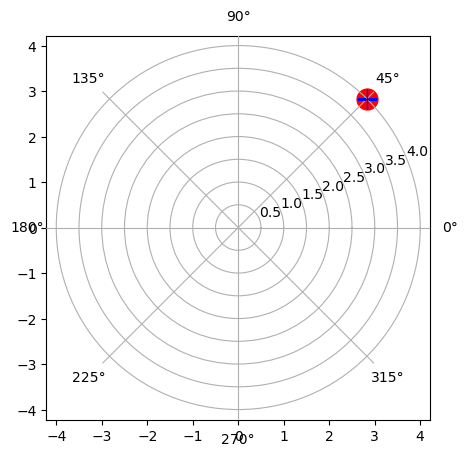

In [114]:
fig = plt.figure()

ax_cart = fig.add_axes([.1, .1, .8, .8])
ax_polr = fig.add_axes([.1, .1, .8, .8], polar=True, frameon=False)

ax_polr.plot(theta, radius, 'b+', markersize=15)
ax_cart.plot([x], [y], 'ro', markersize=15)

r = ax_polr.get_rmax()

ax_cart.set_xlim([-r, r])
ax_cart.set_ylim([-r, r])
ax_cart.set_aspect(1/ax_cart.get_data_ratio())

plt.show()